## ALL EARTHQUAKES SOUTH AMERICAN SUBDUCTION ZONE
1960 - 2018

#### First import modules:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import additional modules:**

In [3]:
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib import colors
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

#### Set path to data:

In [4]:
fp = "/Users/Nellimetiainen/Desktop/SA-earthquakes.csv"

#### Set dataframe and datetime index:

In [5]:
dataFrame = pd.read_csv(fp, parse_dates=True, index_col='time', sep=',')

## Plotting data

### All earthquakes 1960-2017 (Map only) (with different sized markers according to magnitude)

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


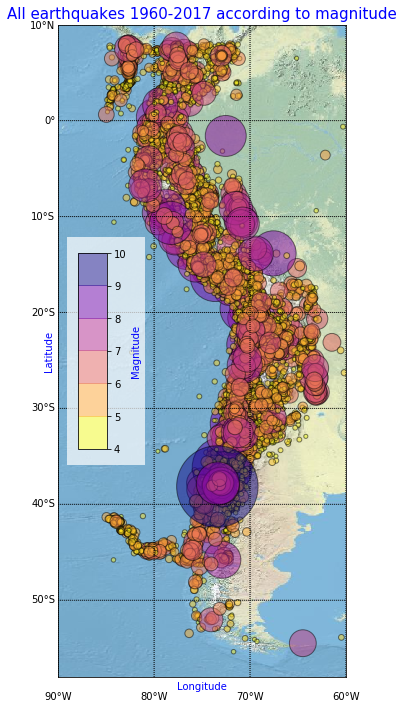

In [5]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set figure size:
plt.rcParams['figure.figsize'] = [6,12]

# Determine figure:
fig = plt.figure()

# Add title for figure:
#fig.suptitle('All earthquakes', fontsize=25, fontweight='bold')
ax = fig.add_subplot(111)

# Make map figure on the right side of the barplot to plot earthquake locations and magnitudes        
# Setup Lambert Conformal basemap
# Set resolution=None to skip processing of boundary datasets
m = Basemap(width=4000000,height=9000000,projection='cyl',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
            llcrnrlon=-90,urcrnrlon=-60)

# If you want to have borders or shoreline take off #
        #m.drawcountries()
        #m.drawcoastlines()

# Import topography map - to change colour intensity set alpha to wanted level        
#m.etopo(alpha=0.75)
m.arcgisimage(service='World_Physical_Map')

# Set axis:
lon,lat = m(dataFrame["longitude"].values, dataFrame["latitude"].values)

# Make scatter plot. s=size of points, c=color, cmap determines chosen colorbar colors, alpha makes points less opaque, edgecolors determines the color of point edges        
plot1 = plt.scatter(lon, lat, s=0.0001*dataFrame["mag"]**8, c=dataFrame["mag"], cmap='plasma_r', alpha=0.5, edgecolors='black')

# Set grid for parallels and meridians:
x, y = m(*np.meshgrid(lon,lat))
parallels = np.arange(-80.,81.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
meridians = np.arange(10.,351.,10.)
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add title and labels:
plt.title ('All earthquakes 1960-2017 according to magnitude', fontsize=15, color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 7)
bounds = np.linspace(4, 10, 7)
plot1.set_clim(4.5, 9.5)
cbbox = inset_axes(ax, '27%', '35%', loc = 6, borderpad=0.9)
[cbbox.spines[k].set_visible(False) for k in cbbox.spines]
cbbox.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
cbbox.set_facecolor([1,1,1,0.7])
axins1 = inset_axes(ax, width="10%", height="30%", loc=6, borderpad=2)
cbar = plt.colorbar(cax=axins1, cmap=cmap, orientation="vertical", boundaries=bounds)
cbar.set_label('Magnitude', color='blue')

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Save figure as picture:
plotFile = "all_eq_mag" + ".png"
plt.savefig(savepath+plotFile)

#plt.close("all")

# Display image:
plt.show()

### All earthquakes 1960-2017 (Map only) (all same marker size)

In [ ]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set figure size:
plt.rcParams['figure.figsize'] = [6,12]

# Determine figure:
fig = plt.figure()

# Add title for figure:
#fig.suptitle('All earthquakes in South America', fontsize=18, fontweight='bold')
ax = fig.add_subplot(111)

# Make map figure on the right side of the barplot to plot earthquake locations and magnitudes        
# Setup Lambert Conformal basemap
# Set resolution=None to skip processing of boundary datasets
m = Basemap(width=4000000,height=9000000,projection='cyl',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
            llcrnrlon=-90,urcrnrlon=-60)    

# If you want to have borders or shoreline take off #
        #m.drawcountries()
        #m.drawcoastlines()

# Import topography map - to change colour intensity set alpha to wanted level        
#m.etopo(alpha=0.75)
m.arcgisimage(service='World_Physical_Map')

# Set axis:
lon,lat = m(dataFrame["longitude"].values, dataFrame["latitude"].values)

# Make scatter plot. s=size of points, c=color, cmap determines chosen colorbar colors, alpha makes points less opaque, edgecolors determines the color of point edges        
plot1 = plt.scatter(lon, lat, s=4, c=dataFrame["mag"], alpha=1, edgecolors='black')

# Set grid for parallels and meridians:
x, y = m(*np.meshgrid(lon,lat))
parallels = np.arange(-80.,81.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
meridians = np.arange(10.,351.,10.)
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles and labels:
plt.title ('All earthquakes 1960-2017', fontsize=15, color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Save figure as picture:
plotFile = "all_eq_mag_same" + ".png"
plt.savefig(savepath+plotFile)

#plt.close("all")
plt.show()

# All earthquakes map + bar plots according to magnitude

### Make new columns to organize data by value:
##### Separate columns for different magnitude categories

In [7]:
# Magnitudes:
dataFrame['Light'] = dataFrame['mag'].loc[(dataFrame['mag'] >= 4.5) & (dataFrame['mag'] <= 4.9)]
dataFrame['Moderate'] = dataFrame['mag'].loc[(dataFrame['mag'] >= 5.0) & (dataFrame['mag'] <= 5.9)]
dataFrame['Strong'] = dataFrame['mag'].loc[(dataFrame['mag'] >= 6.0) & (dataFrame['mag'] <= 6.9)]
dataFrame['Major'] = dataFrame['mag'].loc[(dataFrame['mag'] >= 7.0) & (dataFrame['mag'] <= 7.9)]
dataFrame['Great'] = dataFrame['mag'].loc[(dataFrame['mag'] >= 8.0) & (dataFrame['mag'] <= 10)]

# All earthquakes with a magnitude of over 6:
dataFrame['Mag over 6'] = dataFrame['mag'].loc[(dataFrame['mag'] >= 6.0) & (dataFrame['mag'] <= 10)]

# All earthquakes with a magnitude over 8:
dataFrame['Mag over 8'] = dataFrame['mag'].loc[(dataFrame['mag'] >= 8.0) & (dataFrame['mag'] <= 10)]
dataFrame['Eight'] = dataFrame['mag'].loc[(dataFrame['mag'] >= 8.0) & (dataFrame['mag'] <= 8.9)]
dataFrame['Nine'] = dataFrame['mag'].loc[(dataFrame['mag'] >= 9.0) & (dataFrame['mag'] <= 10)]

In [12]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [12,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set up figure for subplots:
f, ax = plt.subplots(nrows=1, ncols=2)

# Title for whole figure:
plt.suptitle('Earthquakes in South America 1960-2017 according to magnitude', fontsize=18, fontweight='bold')

## Set up for bar plot:
# Make a bar every 2 degrees latitude:
barIncrement = 2
barBins= np.arange(8, -56, -barIncrement)
# Determine the length of bars:
numBars = len(barBins)
# Separate different depth earthquakes:
lightCount = np.zeros(numBars)
moderateCount = np.zeros(numBars)
strongCount = np.zeros(numBars)
majorCount = np.zeros(numBars)
greatCount = np.zeros(numBars)
        
# Make bar plot (load values):
for i in range(numBars):
            numLight = dataFrame['Light'].loc[(dataFrame['latitude'] > barBins[i]-barIncrement) & (dataFrame['latitude'] <= barBins[i])].count()
            lightCount[i] = lightCount[i] + numLight
            
            numModerate = dataFrame['Moderate'].loc[(dataFrame['latitude'] > barBins[i]-barIncrement) & (dataFrame['latitude'] <= barBins[i])].count()
            moderateCount[i] = moderateCount[i] + numModerate
            
            numStrong = dataFrame['Strong'].loc[(dataFrame['latitude'] > barBins[i]-barIncrement) & (dataFrame['latitude'] <= barBins[i])].count()
            strongCount[i] = strongCount[i] + numStrong
            
            numMajor = dataFrame['Major'].loc[(dataFrame['latitude'] > barBins[i]-barIncrement) & (dataFrame['latitude'] <= barBins[i])].count()
            majorCount[i] = majorCount[i] + numMajor
            
            numGreat = dataFrame['Great'].loc[(dataFrame['latitude'] > barBins[i]-barIncrement) & (dataFrame['latitude'] <= barBins[i])].count()
            greatCount[i] = greatCount[i] + numGreat
            
# Plot bars:
ax[0].barh(y=barBins-(barIncrement/2), width=lightCount, label='4.5 - 4.9', color='yellow', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=moderateCount, left=lightCount, label='5.0 - 5.9', color='orange', alpha = 0.4) 
ax[0].barh(y=barBins-(barIncrement/2), width=strongCount, left=lightCount+moderateCount, label='6.0 - 6.9', color='palevioletred', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=majorCount, left=lightCount+moderateCount+strongCount, label='7.0 - 7.9', color='purple', alpha = 0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=greatCount, left=lightCount+moderateCount+strongCount+majorCount, label='> 8.0', color='indigo', alpha = 0.4)

# Set limits:
totalCount = lightCount + moderateCount + strongCount + majorCount + greatCount
allQuakes = 1700
ax[0].set_xlim(allQuakes, 0)
ax[0].set_xticks(np.arange(0,allQuakes+1,200))
ax[0].set_xlabel('Number of earthquakes', color='blue')
ax[0].set_ylim(10, -60)
ax[0].set_yticks(10, -60, 5)

# Add grid:
ax[0].grid(axis='x')

# Add titles:
ax[0].set_title('Distribution of different magnitude earthquakes', color='blue')
#ax.set_xlabel('Number of earthquakes', color='blue')
#ax[0].ylabel('Latitude', color='blue')

# Add legend and set location:
ax[0].legend(loc = 3, title='Magnitude')

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='cyl',
resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
llcrnrlon=-90,urcrnrlon=-60)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(dataFrame["longitude"].values, dataFrame["latitude"].values)
plot1 = plt.scatter(lon1, lat1, s=50, c=dataFrame["mag"], cmap='plasma_r', alpha=0.5)

# Set grid and parallels and meridians:
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Distribution of earthquakes and magnitude', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma_r', 7)
# Set clear boundaries for values in colorbar with bounds:
bounds = np.linspace(4, 10, 7)
# Set min and max values with clim:
plt.clim(4, 10)
# Make white background box for colorbar / legend:
cbbox = inset_axes(ax[1], '25%', '35%', loc = 6, borderpad=1)
[cbbox.spines[k].set_visible(False) for k in cbbox.spines]
cbbox.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
cbbox.set_facecolor([1,1,1,0.7])
axins1 = inset_axes(ax[1], width="10%", height="30%", loc=6, borderpad=2)
#Make colorbar - specify where it's dispalyed with location, pad = space between figure and bar, include boundaries:
cbar = plt.colorbar(cax=axins1, cmap=cmap, orientation="vertical", boundaries=bounds)
# Colorbar title:
cbar.set_label('Magnitude', color='blue')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Make space between main title and plots:   
plt.subplots_adjust(top=0.92)
    
# Save figure as picture:
plotFile = str('All_eq_mag_bar+map1') + ".png"
plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures in the loop:
plt.show()
#plt.close("all")

TypeError: set_yticks() takes from 2 to 3 positional arguments but 4 were given